Based on the code at: https://medium.com/cuenex/pandas-2-0-vs-polars-the-ultimate-battle-a378eb75d6d1

See the comments as the code article is rather buggy

In [7]:
import pandas as pd
import polars as pl
import time
import matplotlib.pyplot as plt

### Reading in a parquet file

In [5]:
# Read the parquet file using pandas
start_time = time.time()
train_pd = pd.read_parquet('../train.parquet/train.parquet')
end_time = time.time()
pandas_parquet_read_time = end_time - start_time
# Read the parquet file using polars
start_time = time.time()
train_pl = pl.read_parquet('../train.parquet/train.parquet')
end_time = time.time()
polars_parquet_read_time = end_time - start_time

In [6]:
print(pandas_parquet_read_time,polars_parquet_read_time)

5.47492241859436 1.6572272777557373


### Aggregating data

In [8]:
# Define the actual numeric and categorical columns based on your data
cats = ['cat_1', 'cat_2', 'cat_3'] # Replace with your actual numeric column names
nums = ['num_7', 'num_8', 'num_9'] # Replace with your actual categorical column names

In [9]:
# Function to perform time manipulations using pandas
def pandas_manipulations(df):
    start_time = time.time()
    numeric_aggregations = df[nums].agg(['min', 'max', 'mean', 'median', 'std'])
    categorical_aggregations = df[cats].agg(['nunique'])
    end_time = time.time()
    return end_time - start_time

# Function to perform time manipulations using polars
def polars_manipulations(df):
    start_time = time.time()
    result = df.with_columns([
    pl.col(num).min().alias(f'{num}_min') for num in nums
    ] + [
    pl.col(num).max().alias(f'{num}_max') for num in nums
    ] + [
    pl.col(num).mean().alias(f'{num}_mean') for num in nums
    ] + [
    pl.col(num).median().alias(f'{num}_median') for num in nums
    ] + [
    pl.col(num).std().alias(f'{num}_std') for num in nums
    ] + [
    pl.col(cat).n_unique().alias(f'{cat}_unique') for cat in cats
    ])
    end_time = time.time()
    return end_time - start_time

In [10]:
# Measure execution times
pandas_time = pandas_manipulations(train_pd)
polars_time = polars_manipulations(train_pl)

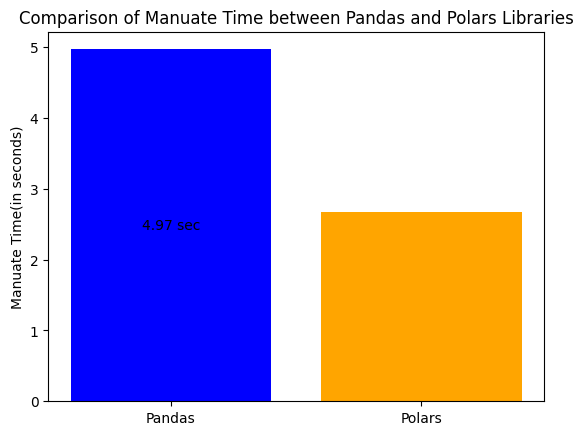

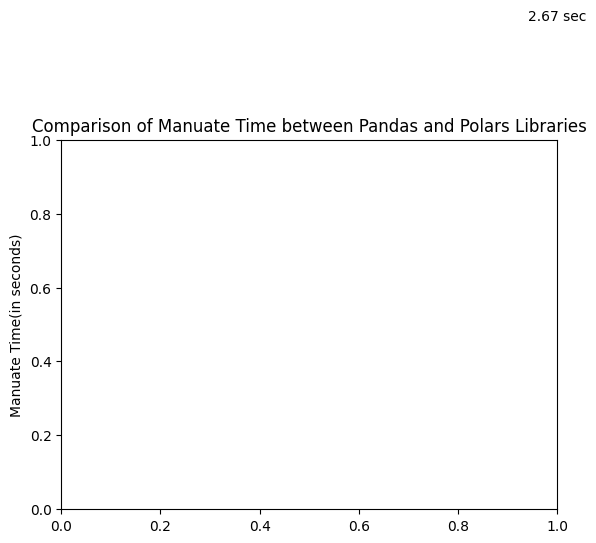

In [12]:
# Plot the execution times
labels = ['Pandas', 'Polars']
times = [pandas_time, polars_time]
plt.bar(labels, times, color=['blue', 'orange'])
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time Comparison: Pandas vs Polars')
for i, time in enumerate(times):
    plt.text(i, time / 2, f'{time:.2f} sec', ha='center', va='center')
    plt.ylabel('Manuate Time(in seconds)')
    plt.title('Comparison of Manuate Time between Pandas and Polars Libraries')
    plt.show()